### Importing Required Libraries

In [2]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Loading data

In [3]:
# Pima Indians Diabetes Database
# Predict the onset of diabetes based on diagnostic measures
# https://www.kaggle.com/uciml/pima-indians-diabetes-database

# load dataset
pima = pd.read_csv("diabetes.csv")

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Colinearity matrix

In [6]:
feature_cols = list(pima.columns)
feature_cols.pop()  # remove outcome column
col_values = pima[feature_cols].values.tolist()
num_features = len(col_values[0])

data = np.array(col_values)
t_data = data.transpose()
print(t_data)

[[  6.      1.      8.    ...   5.      1.      1.   ]
 [148.     85.    183.    ... 121.    126.     93.   ]
 [ 72.     66.     64.    ...  72.     60.     70.   ]
 ...
 [ 33.6    26.6    23.3   ...  26.2    30.1    30.4  ]
 [  0.627   0.351   0.672 ...   0.245   0.349   0.315]
 [ 50.     31.     32.    ...  30.     47.     23.   ]]


In [7]:
from scipy.stats import pearsonr
correlation_matrix = [round(pearsonr(t_data[i], t_data[j])[0], 2) 
                      for i in range(num_features) 
                      for j in range(num_features)]
correlation_matrix = np.reshape(correlation_matrix, (num_features, num_features))
print(correlation_matrix)

[[ 1.    0.13  0.14 -0.08 -0.07  0.02 -0.03  0.54]
 [ 0.13  1.    0.15  0.06  0.33  0.22  0.14  0.26]
 [ 0.14  0.15  1.    0.21  0.09  0.28  0.04  0.24]
 [-0.08  0.06  0.21  1.    0.44  0.39  0.18 -0.11]
 [-0.07  0.33  0.09  0.44  1.    0.2   0.19 -0.04]
 [ 0.02  0.22  0.28  0.39  0.2   1.    0.14  0.04]
 [-0.03  0.14  0.04  0.18  0.19  0.14  1.    0.03]
 [ 0.54  0.26  0.24 -0.11 -0.04  0.04  0.03  1.  ]]


In [8]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

Text(0.5, 1.1, 'Correlation matrix')

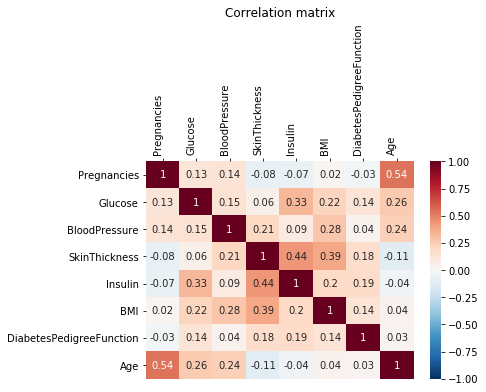

In [9]:
class_names=feature_cols
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu_r" ,fmt='g', vmin=-1, vmax=1,
           xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_ticks_position('top')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title('Correlation matrix', y=1.1)

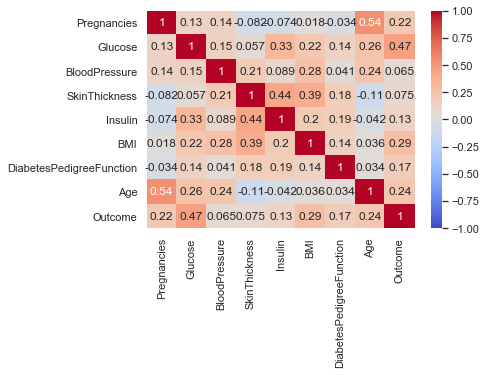

In [10]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = pima.corr()

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

### Feature Selection

In [29]:
#split dataset in features and target variable
feature_cols = ['BMI','Age', 'Glucose']
X = pima[feature_cols] # Features (independent variables)
y = pima.Outcome # Target variable

### Splitting Data

In [30]:
# Split dataset into training set and test set
# 75% training and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

### Building the Logistic Regression Model

In [31]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# Predict labels
y_pred=logreg.predict(X_test)

### Evaluating the Model

In [32]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[109,  14],
       [ 27,  42]])

In [33]:
# import required modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

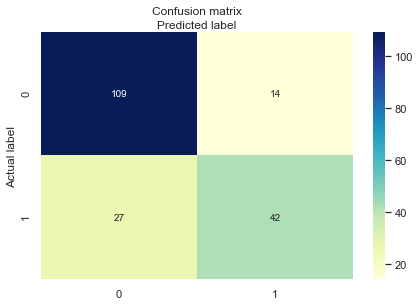

In [34]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7864583333333334
Precision: 0.75
Recall: 0.6086956521739131


In [36]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       123
           1       0.75      0.61      0.67        69

    accuracy                           0.79       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.78      0.79      0.78       192



### Explaining the Logistic Regression Model

In [28]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.653205
         Iterations 4
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.013  
Dependent Variable: Outcome          AIC:              758.4923
Date:               2020-09-01 14:34 BIC:              771.5606
No. Observations:   576              Log-Likelihood:   -376.25 
Df Model:           2                LL-Null:          -371.29 
Df Residuals:       573              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     4.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
BMI         -0.0388    0.0097  -4.0152  0.0001  -0.0577  -0.0198
Age         -0.0132    0.0073  -1.8044  0.0712  -0.0275   0.0011
Glucose      0.0100   